[Lecture 3](./lecture-03.ipynb)


# Comparing the size of flow reactors Ch 2.4

For the CSTR we have seen that:

 $V = \frac{1}{-r_A} F_{A0} X$ 

and for the PFR we have

 $V = F_{A0} \int_0^X \frac{1}{-r_A} dX$ 

These two equations are related. Let's consider some data (Table 2-1 Fogler):



In [26]:
import numpy as np
X = np.array([0, 0.1, 0.2, 0.4, 0.6, 0.7, 0.8])
ra = -np.array([0.45, 0.37, 0.30, 0.195, 0.113, 0.079, 0.05])

Now, let's plot the data in a form known as a Levenspiel plot.



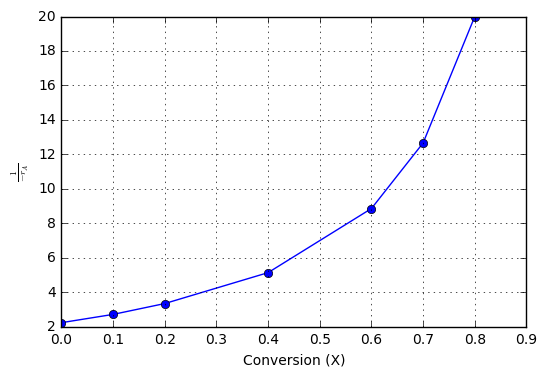

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(X, 1 / -ra, 'bo-')
plt.xlabel('Conversion (X)')
plt.ylabel(r'$\frac{1}{-r_A}$')
plt.grid()

Now, we can interpret the volume of a CSTR to be proportional to the area of a rectangle that is defined by  $F_{A0} X \frac{1}{-r_A}$ .

The volume of the PFR, in contrast, is the area under this curve up to the desired conversion. So, for this reaction, the PFR will always have a lower volume than a CSTR for a given conversion. Here is a graphical representation of this.



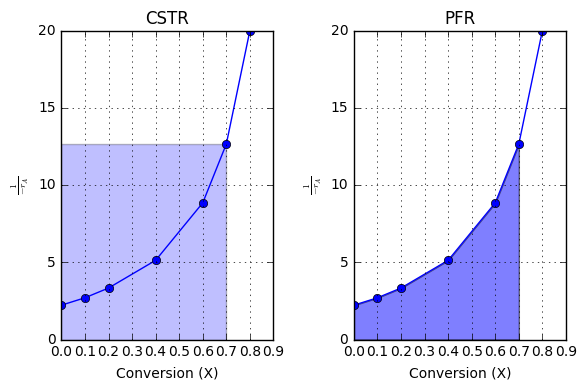

In [30]:
ira = 1 / -ra
plt.subplot(1, 2, 1)
plt.plot(X, ira, 'bo-')
plt.xlabel('Conversion (X)')
plt.ylabel(r'$\frac{1}{-r_A}$')
plt.grid()
plt.title('CSTR')
plt.fill_between([0, X[5]], [ira[5],  ira[5]], alpha=0.25)

plt.subplot(1, 2, 2)
plt.title('PFR')
plt.plot(X, ira, 'bo-')
plt.xlabel('Conversion (X)')
plt.ylabel(r'$\frac{1}{-r_A}$')
plt.grid()
plt.fill_between(X[0:6], ira[0:6], alpha=0.5)
plt.tight_layout()

Let's suppose that  $F_{A0}=0.4$ mol/s, and estimate the volume required for a CSTR and PFR at 80% conversion. For the CSTR we have:



In [38]:
X[-2]

0.69999999999999996

In [44]:
-ra[-1]

0.050000000000000003

In [47]:
(-ra / -ra**2)[-1]

-19.999999999999996

In [51]:
-ra / (-ra**2)[-1]

a = -ra / -ra**2
a[-1]

-19.999999999999996

In [67]:
Fa0 = 0.4  # mol / s

V = Fa0 * X[-1] * (1 / -ra)[-1]

print('The volume of the CSTR is {:1.3f} m^3'.format(V))

The volume of the CSTR is 6.400 m^3


The PFR is a little more difficult. We have to perform an integral of the discrete data. We can use the trapezoid method of integration:



In [68]:
from scipy.integrate import trapz

V = Fa0 * trapz(1 / -ra, X)

print('The volume of the PFR is {:1.3f} m^3'.format(V))

The volume of the PFR is 2.200 m^3


Or Simpson's method:



In [69]:
from scipy.integrate import simps

V = Fa0 * simps(1 / -ra, X)

print('The volume of the PFR is {:1.3f} m^3'.format(V))

The volume of the PFR is 2.150 m^3


Neither is "right", they both involve approximations to the true value of the integral.

Now, what do we do for conversions between the known data points?


# Interpolation

What about the volume of a reactor at X=0.5? We do not have data there, and we have no way to get new data. You have to interpolate to get the answer. The best way to do this is to let Python do the interpolating for you by creating an interpolating function.



In [78]:
from scipy.interpolate import interp1d

f = interp1d(X, ra)
print(f)
print(f([0, 0.2,.5]))
print(X)
print(ra)

[-0.45  -0.3   -0.154]
[ 0.   0.1  0.2  0.4  0.6  0.7  0.8]
[-0.45  -0.37  -0.3   -0.195 -0.113 -0.079 -0.05 ]


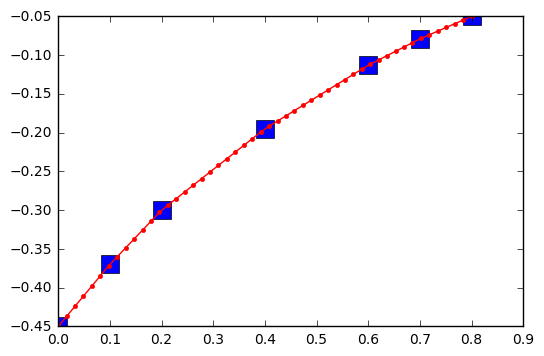

In [85]:
plt.plot(X, ra, 'bs', markersize=13)
x = np.linspace(0, 0.8)
plt.plot(x, f(x), 'r.-')

In [71]:
X5 = 0.5
ra5 = f(X5)
V = Fa0 * X5 * (1 / -ra5)

print('The volume of the CSTR is {:1.3f} m^3 at X={}.'.format(V, X5))

The volume of the CSTR is 1.299 m^3 at X=0.5.


For the PFR we have some decisions to make. The best path might be to use quad. This is the simple approach that 



In [72]:
from scipy.integrate import quad

def integrand(X):
    return Fa0 / -f(X)

ans, err = quad(integrand, 0, X5)
print('The volume of the PFR is {:1.3f} m^3 at X={}.'.format(ans, X5))

The volume of the PFR is 0.776 m^3 at X=0.5.


In [76]:
X5 = np.linspace(0, 0.5)
ra5 = f(X5)
ira5 = 1 / ra5

print(trapz(Fa0 * -ira5, X5))

0.776261647702


In [77]:
# Show interpolation on 1 / -ra
ira = 1 / -ra
f2 = interp1d(X, ira)
trapz(Fa0 * f2(X5), X5)

0.80007291901303612

**Exercise**: An alternative to interpolating on - $r_A$ is to interpolate on  $1 / -r_A$ . Make an array of 50 points in X, compute  $-r_A$ on it, and then plot  $1/-r_A$ along with the known data points for  $-1/-r_A$ . Does it look weird to you?  What do you think is happening?


# Reactors in series (Ch 2.5)

It is common to put reactors in a series. Maybe because it results in a lower volume, and maybe because there is no single reactor that is large enough.

We have to figure out a way to model these. It is useful to define conversion at a point in the stream as:

 $X_i = \frac{\textrm{Total moles reacted at point i}}{\textrm{Total moles fed to first reactor}}$ 

Then, we have at point  $i$ that  $F_A = F_{A0}(1 - X_i)$ .


## Example in Ch 2.5.1

Our goal is to find the volumes of these two reactors that result in a conversion of 0.4 out of the first reactor, and 0.8 out of the second reactor. 

![img](https://raw.githubusercontent.com/jkitchin/s17-06364/master/lectures/images/cstr-series.png)

The following data is provided:



In [95]:
X = np.array([0.0, 0.1, 0.2, 0.4, 0.6, 0.7, 0.8])

# F_{A0} / -ra (m^3)
Fra = np.array([0.89, 1.09, 1.33, 2.05, 3.54, 5.06, 8.0])

The first reactor is straightforward,

 $V_1 = \frac{F_{A0}}{-r_{A, X_1}} X_1$ 

In the data, the fourth data point corresponds to a conversion of 0.4, and we use indexing to get the 4th point (remember indexes start at 0, so the fourth data point is index=3).



In [96]:
X1 = X[3]
V1 = Fra[3] * X1

# Just for fun, we can get nicer display of superscripts like this.
from IPython.core.display import HTML
HTML('The volume of the first reactor is {:1.2f} m<sup>3</sup>.'.format(V1))

If you prefer Latex, you can do this instead.



In [97]:
from IPython.core.display import Latex
Latex('The volume of the first reactor is {:1.2f} m$^3$.'.format(V1))

<IPython.core.display.Latex object>

While we are looking at alternate output formats, let's look at another kind of notebook magic. You can use %%html in the first line of a cell, and the contents will be rendered in that formats.



In [98]:
%%html
You can put html like <font color="green">colored text</font> in your notebooks. You can put subscripts like H<sub>2</sub>O and superscripts like m<sup>3</sup> if you want to. These are just tools for making <i>your</i> documents look nicer.

Ok, back to the second reactor.

The molar flow going into the reactor is  $F_{A1} = F_{A0}(1 - X_1)$ . At point 2 we have  $F_{A2} = F_{A0}(1 - X_2)$ . The mole balance becomes:

 $0 = F_{A1} - F_{A2} + r_A V_2$ 

We can solve this for  $V_2$ as:

 $V_2 = F_{A0} / r_A ((1 - X_2) - (1 - X_1))$ 

I would stop the solution here. We can further simplify it, but there is no need. At X=0.8, we know from the data that  $F_{A0} / r_A = 8.0$ , so we can simply evaluate the expression.



In [99]:
X2 = X[-1]
V2 = -Fra[-1] * ((1 - X2) - (1 - X1))
HTML('The volume of the second reactor is {:1.2f} m<sup>3</sup>.'.format(V2))

Graphically we have this on the Levenspiel plot:



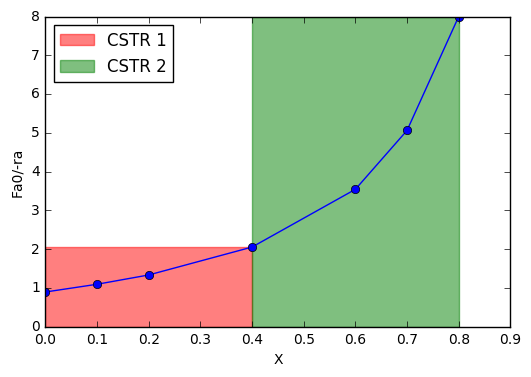

In [100]:
plt.plot(X, Fra, 'bo-')
plt.xlabel('X')
plt.ylabel('Fa0/-ra')
plt.fill_between([0, X1], [Fra[3], Fra[3]], color='r', alpha=0.5, label='CSTR 1')
plt.fill_between([X1, X2], [Fra[-1], Fra[-1]], color='g', alpha=0.5, label='CSTR 2')
plt.legend(loc='best')

**Exercise** Work out example 2-6 using the Jupyter notebook. Verify that you get the same volumes, and the same plot as in Figure 2-8.


# Adiabatic isomerization

The reaction  $n-C_4H_{10} \rightarrow i-C_4H_{10}$ is exothermic. If it is run in an adiabatic reactor, the temperature in the reactor will be a function of conversion, and so the rate will not be a simple function of just concentration. You can see in the data below that the rate appears to increase initially, then decrease. For isothermal reactions, we expect the rate to only decrease as the reactants are consumed. Here the reactants are consumed, but the rate goes up because the temperature is increasing.



In [106]:
X = np.array([0, 0.2, 0.4, 0.6, 0.65])
ra = -np.array([39, 53, 59, 38, 25])  # kmol/m^3/h

Our goal here is to design three reactors in this configuration and determine the volumes of each reactor for an entering molar flow of 50 kmol/hr of n-butane.

![img](https://raw.githubusercontent.com/jkitchin/s17-06364/master/lectures/images/example-2-7.png)

First, we compute the Levenspiel quantities. This will help us solve the problem because the volumes of these reactors are related to the Levenspiel quantities.



In [107]:
Fa0 = 50 # kmol/hr
Fra = Fa0 / -ra

X1 = 0.2
V1 = Fra[1] * X1
print('V1 = {:1.3f} m^3'.format(V1))

V1 = 0.189 m^3


For the PFR, we have to evaluate the integral:

 $V_2 = \int_{X_1}^{X_2} \left(\frac{F_{A0}}{-r_A}\right)dX$ 

We have discrete data so we will use Simpson's method. We use indexing to access the data we want. Remember that [1:4] means take the data starting at index=1 (the second point) up to but not including index=4. So there will be three data points. It is always a good idea to check that we get what we want. 



In [108]:
print(X[1:4])

[ 0.2  0.4  0.6]


So, that shows us we get the data for X1=0.2 to X2=0.6.



In [109]:
from scipy.integrate import simps

V2 = simps(Fra[1:4], X[1:4])
print('V2 = {:1.3f} m^3'.format(V2))

V2 = 0.377 m^3


Finally, for the final CSTR we just evaluate:

 $V_3 = Fa0 / r_A (X3 - X2)$ 



In [110]:
X3 = 0.65
X2 = 0.6
V3 = Fra[-1] * (X3 - X2)
print('V3 = {:1.3f} m^3'.format(V3))

V3 = 0.100 m^3


Note the style here of breaking up the code cells with intermediate narrative text. I want you to do that too in your homework.

Graphically we have this:



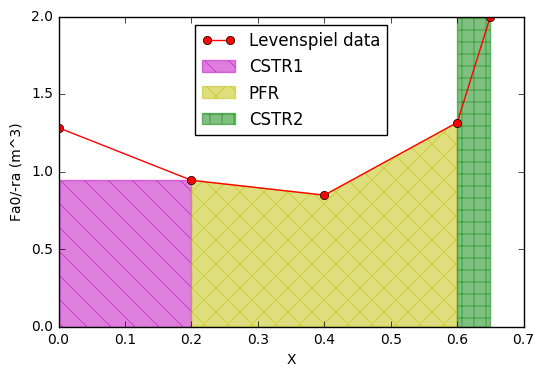

In [117]:
plt.plot(X, Fra, 'ro-', label='Levenspiel data')
plt.xlabel('X')
plt.ylabel('Fa0/-ra (m^3)')
plt.fill_between([0, X1], [Fra[1], Fra[1]], color='m', hatch='\\', alpha=0.5, label='CSTR1')
plt.fill_between(X[1:4], Fra[1:4], hatch='X', color='y', label='PFR', alpha=0.5)
plt.fill_between([X2, X3], [Fra[-1], Fra[-1]], color='g', hatch='+', alpha=0.5, label='CSTR2')
plt.legend(loc='upper center')

**Exercise** It looks like you could have an overall smaller volume with two reactors. What two reactors are they, and how should they be configured?

Next lecture: [./lecture-05.ipynb](./lecture-05.ipynb)


# New concepts

1.  Numerical integration of discrete data: [scipy.integrate.trapz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapz.html) and [scipy.integrate.simps](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html)
2.  Interpolation: [scipy.interpolate.interp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html)
3.  Plotting subplots, shaded areas, and the legend
    -   [matplotlib.pyplot.subplot](https://www.google.com/#safe=off&q=matplotlib.pyplot.subplot)
    -   [matplotlib.pyplot.fill_between](https://www.google.com/#safe=off&q=matplotlib.pyplot.fill_between)
    -   [matplotlib.pyplot.legend](https://www.google.com/#safe=off&q=matplotlib.pyplot.legend)

You should complete reading Chapter 2 this week.

